## Mortality and Ventilator Duration with AKI Diagnosis

Set working directory using `setwd()` and read in the file

In [1]:
data <- read.csv('./merged 2.csv')

## Mortality and AKI
Regress (logistic regression) `mortality` on `AKI`, `age`, `sepsis`, and `PRISM` score.

In [2]:
modelMort <- glm(mortality_v2 ~ as.factor(AKI.cat) + Admit.Age..yrs. + as.factor(Sepsis.Dx) + PRISM.III ,
family=binomial(link="logit"),data = data)

summary(modelMort)


Call:
glm(formula = mortality_v2 ~ as.factor(AKI.cat) + Admit.Age..yrs. + 
    as.factor(Sepsis.Dx) + PRISM.III, family = binomial(link = "logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5736  -0.3940  -0.2967  -0.2280   2.7997  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -3.92012    0.35097 -11.170  < 2e-16 ***
as.factor(AKI.cat)1   -0.95229    0.52257  -1.822   0.0684 .  
as.factor(AKI.cat)2    0.39702    0.38699   1.026   0.3049    
Admit.Age..yrs.        0.04121    0.02310   1.784   0.0744 .  
as.factor(Sepsis.Dx)1 -0.29895    0.41905  -0.713   0.4756    
PRISM.III              0.10555    0.01719   6.138 8.35e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 389.07  on 722  degrees of freedom
Residual deviance: 334.71  on 717  degrees of freedom
  (4 observations deleted due

#### Odds Ratios
Obtain odds ratios via *exponentiation* of relevant model coefficients

In [3]:
exp(modelMort$coef)[c(2,3,5)]

as.factor(AKI.cat)1   as.factor(AKI.cat)2 as.factor(Sepsis.Dx)1 
            0.3858545             1.4873809             0.7415975

## Ventilator and AKI
Ordinary least squares linear regression of `ventilator_days` on the same set of explanatory variables.

In [4]:
data <- data[-243,] # remove row with bad entry (52,093) for ventilator days 

In [5]:
summary(data[,"MV.days"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   2.000   5.000   5.819   8.000  42.000     345 

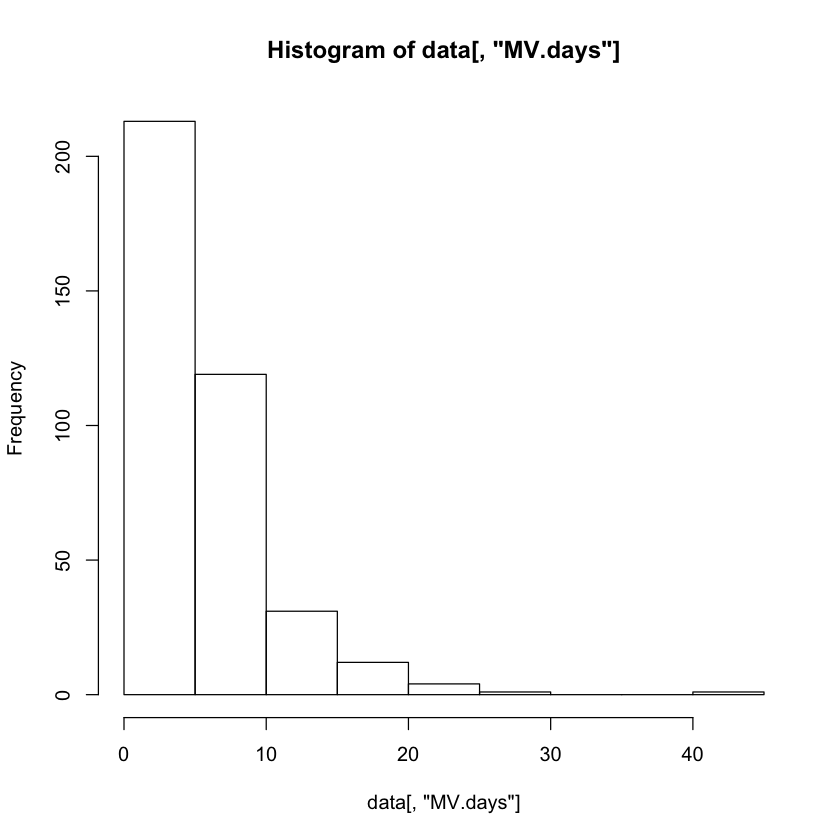

In [6]:
hist(data[,"MV.days"])

### Regression

In [7]:
modelVenti <- lm(MV.days ~ as.factor(AKI.cat) + Admit.Age..yrs. + as.factor(Sepsis.Dx) + PRISM.III, data = data)

summary(modelVenti)


Call:
lm(formula = MV.days ~ as.factor(AKI.cat) + Admit.Age..yrs. + 
    as.factor(Sepsis.Dx) + PRISM.III, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.253 -3.603 -0.913  2.089 36.935 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.13045    0.51651   9.933  < 2e-16 ***
as.factor(AKI.cat)1   -0.53782    0.75578  -0.712 0.477149    
as.factor(AKI.cat)2    0.58897    0.88297   0.667 0.505165    
Admit.Age..yrs.       -0.02990    0.04096  -0.730 0.465820    
as.factor(Sepsis.Dx)1 -0.96928    0.68316  -1.419 0.156788    
PRISM.III              0.11389    0.03391   3.359 0.000864 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.034 on 372 degrees of freedom
  (348 observations deleted due to missingness)
Multiple R-squared:  0.04052,	Adjusted R-squared:  0.02762 
F-statistic: 3.142 on 5 and 372 DF,  p-value: 0.008608
